In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve
from tensorflow import keras
from tensorflow.keras import layers

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data = pd.read_csv('labeledTrainData.tsv', sep='\t')

In [4]:
data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [5]:
data.shape

(25000, 3)

# Preprocessing

Use BeautifulSoup for deleting all html-staff that we don't need

In [6]:
data.review = data.review.apply(lambda x: BeautifulSoup(x).get_text())

<ipython-input-6-e0451b83039d>:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data.review = data.review.apply(lambda x: BeautifulSoup(x).get_text())


Remove all the punctuation marks

In [7]:
def clean(text):
    text = re.sub("[^a-zA-Z]", " ", text)  
    return text

In [8]:
data.review = data.review.apply(clean)

Bring all words to the same register

In [9]:
data.review = data.review.apply(lambda x: x.lower())

Split to separate words (tokenize)

In [10]:
data.review = data.review.apply(lambda x: x.split())

We need to delete all stop words ('a', 'and' etc.). Actually it is about the most frequent words in corpus. We can use prepared bag of stop words from the nltk

In [11]:
print((stopwords.words("english")))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
def clear_stop_words(text, stopwords):
    new_text = [i for i in text if i not in stopwords]
    return new_text

In [13]:
data.review = data.review.apply(lambda x: clear_stop_words(text=x,stopwords=stopwords.words('english')))

We can lemmatize words to get simple forms of them. The nltk will again help us.

In [14]:
lemmatizer = WordNetLemmatizer()

In [15]:
#an example of lemmatizing
print("messages :", lemmatizer.lemmatize("messages"))

messages : message


In [16]:
def lemm(lemmatizer, text):
    new_text = [lemmatizer(word) for word in text]
    return new_text

In [17]:
data.review = data.review.apply(lambda x: lemm(lemmatizer.lemmatize, x))

In [18]:
#create a raw corpus of strings  
clean_train_reviews = []

In [19]:
for i in range(data.review.values.shape[0]):
    clean_train_reviews.append(" ".join(data.review.values[i]))

We create a bag of words using scikit-learn libraries

In [21]:
vectorizer = CountVectorizer(max_features = 5000) 

In [22]:
#get vectors of texts and convert to an array
train_data_features = vectorizer.fit_transform(clean_train_reviews)
train_data_features = train_data_features.toarray()

In [23]:
#check what we got 
print(train_data_features.shape)

(25000, 5000)


In [25]:
#get a vocabulary 
vocabulary = vectorizer.get_feature_names_out()

In [27]:
#see how many times every word appears in texts
dist = np.sum(train_data_features, axis=0)
counter = 0
for tag, count in zip(vocabulary, dist):
    print(count, tag)
    counter += 1
    if counter == 20:
        break

187 abandoned
125 abc
562 ability
1259 able
92 abraham
73 abrupt
118 absence
83 absent
352 absolute
1485 absolutely
306 absurd
86 absurdity
202 abuse
77 abused
91 abusive
98 abysmal
298 academy
688 accent
300 accept
130 acceptable


# Machine learning

### Random Forest

In [ ]:
#for the first use a Random forest. Get it from a scikit-learn library

In [28]:
y = data.sentiment.to_numpy()

In [29]:
#split train data to train and validation sets
X_train, X_test, y_train, y_test = train_test_split(train_data_features,
                                                    y, test_size=0.33, random_state=42)

In [30]:
#we are ready to learn 'rules' with Random Forest
clf = RandomForestClassifier(verbose = 0, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [31]:
#check an accuracy
y_pred = clf.predict(X_test)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      4105
           1       0.85      0.84      0.84      4145

    accuracy                           0.84      8250
   macro avg       0.85      0.85      0.84      8250
weighted avg       0.85      0.84      0.84      8250

0.8449696969696969


<Axes: >

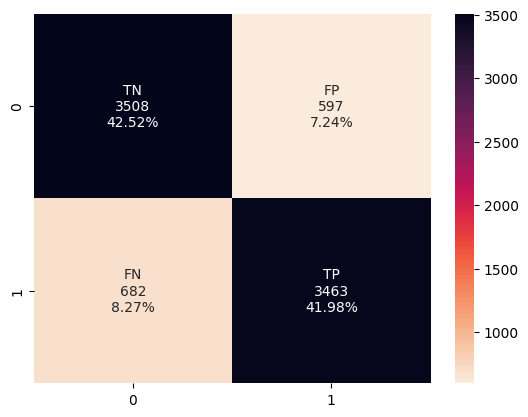

In [33]:
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='rocket_r')

With this simple method we got a good score. Also we checked if lemmatizing is really helpful. It turned out that preprocessing without lemmatizing gave the same result.

### Neural Network

Let's try to use a neural network

In [38]:
X_train.shape

(16750, 5000)

In [72]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[5000]),
    layers.Dense(128, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

In [73]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [74]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, 
)

In [76]:
y_pred_nn = model.predict(X_test)

258/258 [==============================] - 1s 4ms/step


In [77]:
auc_test = roc_auc_score(y_test, y_pred_nn)
fpr, tpr, _ = roc_curve(y_test, y_pred_nn)

In [78]:
def plot_auc_curve(fpr, tpr, auc):
    plt.figure(figsize = (16,6))
    plt.plot(fpr,tpr,'black',linestyle = '-')
    plt.fill_between(fpr, tpr, alpha = 1, color='#D49E26')
    plt.ylabel('True Postive Rate') 
    plt.xlabel('False Postive Rate')
    plt.title(f'ROC Curve Having AUC = {auc}')

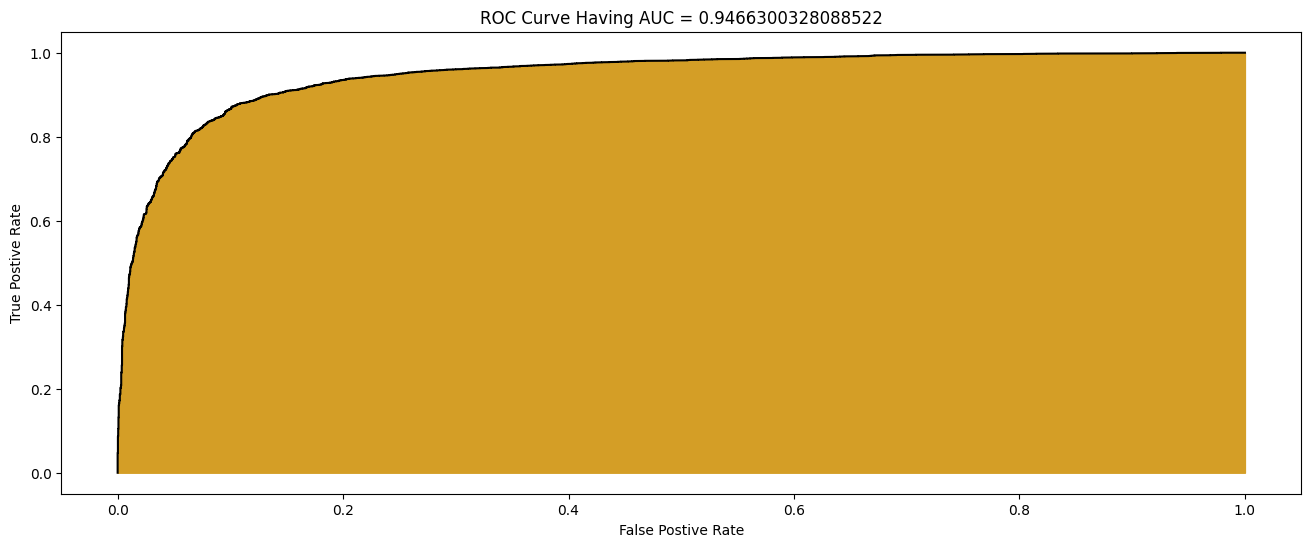

In [79]:
plot_auc_curve(fpr, tpr, auc_test)

In [80]:
#function to convert probabilities into classes
def transform_to_class(y_pred, threshold=0.5):
    y_class = [1. if y_cont > threshold else 0. for y_cont in y_pred] 
    return y_class

In [81]:
y_pred_nn_classes = transform_to_class(y_pred_nn)

In [82]:
print(classification_report(y_test, y_pred_nn_classes))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4105
           1       0.90      0.87      0.88      4145

    accuracy                           0.88      8250
   macro avg       0.89      0.88      0.88      8250
weighted avg       0.89      0.88      0.88      8250



<Axes: >

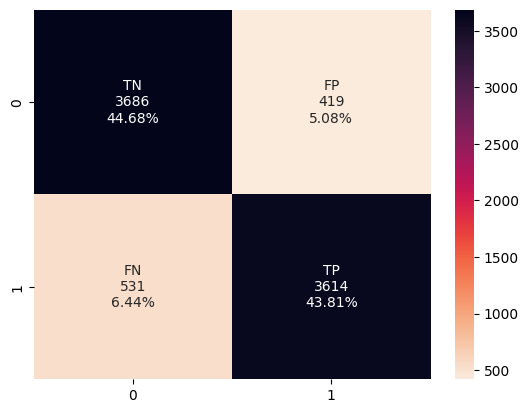

In [83]:
cf_matrix = confusion_matrix(y_test, y_pred_nn_classes)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='rocket_r')

Score was improved